# Template

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, savgol_filter

plt.style.use('science')
plt.rcParams.update({'font.size': 14})

# Plot Measure

In [41]:
def plot_measurement(filepath, channel_names=(r'$U_E$', r'$U_A'), save=False):
    # Read data
    data = pd.read_csv(f'data/{filepath}', skiprows=2, header=None)
    time = data[0] 
    U_2 = data[1]
    U_1 = data[2]
    n1, n2 = channel_names

    # Create figure
    fig, ax = plt.subplots(figsize=(5,4))
    ax.plot(time*1000, U_1, label=n1 + ' (Ch1)', color='royalblue')
    ax.plot(time*1000, U_2, label=n2 + ' (Ch2)', color='tab:orange')
    ax.set_xlabel(r'$t$ / $\text{ms}$', fontsize=16)
    ax.set_ylabel(r'$U$ / $\text{V}$', fontsize=16)
    ax.grid(True)
    ax.set_xlim(-10, 50)
    ax.hlines(0, -10, 50, colors='black', linestyles='-', linewidth=0.7, alpha=0.5)
    # ax.vlines(0, -15, 15, colors='black', linestyles='--', linewidth=0.8, alpha=0.8)
    ax.legend(frameon=True, loc='lower right', framealpha=1, fontsize=16)
    plt.tight_layout()

    if save:
        filename_only = os.path.splitext(os.path.basename(filepath))[0]
        os.makedirs("results", exist_ok=True)
        out_path = f"results/{filename_only}.png"
        fig.savefig(out_path, dpi=300)
        print(f"Saved figure to {out_path}")

    return fig

In [42]:
def get_all_csv() -> list[str]:
    files = sorted([i for i in os.listdir(os.getcwd() + '/data') if i[-4:] == '.csv'])
    if not files:
        print(f"Keine .csv Dateien gefunden.")
        return []

    return list(files)

['V03_Kondensator.csv', 'V04_Spule.csv', 'V05_RC.csv', 'V06_RL.csv']
Saved figure to results/V03_Kondensator.png
Saved figure to results/V04_Spule.png
Saved figure to results/V05_RC.png
Saved figure to results/V06_RL.png


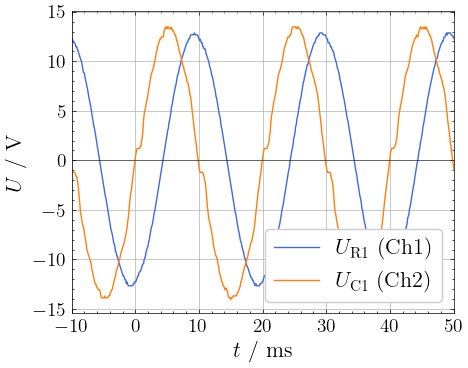

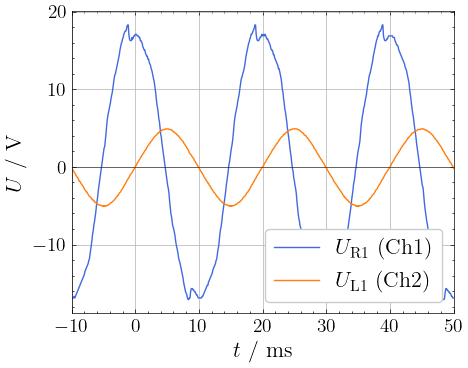

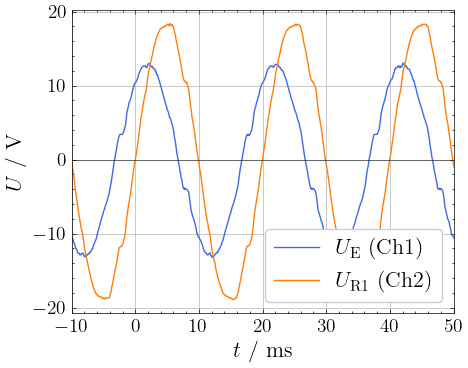

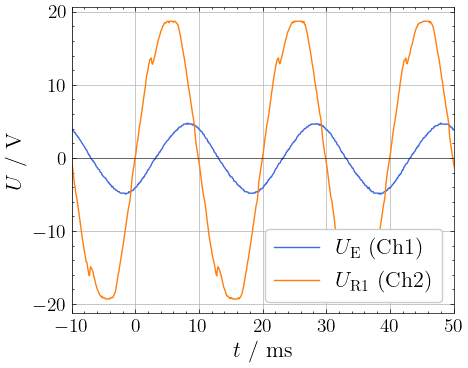

In [ ]:
names = [
    (r'$U_\text{R1}$', r'$U_\text{C1}$'),
    (r'$U_\text{R1}$', r'$U_\text{L1}$'),
    (r'$U_\text{E}$', r'$U_\text{R1}$'),
    (r'$U_\text{E}$', r'$U_\text{R1}$'),
]
cursor = [
    
]
files = get_all_csv()
print(files)
for i,f in enumerate(files):
    plot_measurement(f, names[i],True)